In [3]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [2]:
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

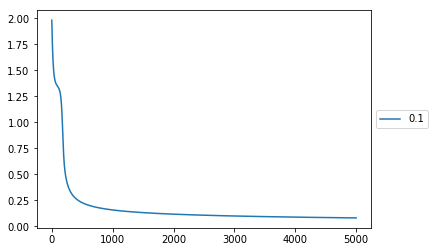

Number of misclassifications: 0


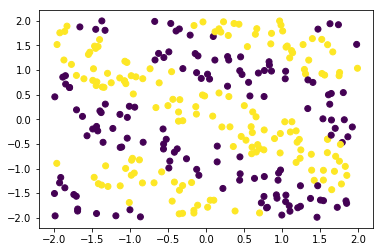

In [9]:
# libraries
from autograd import numpy as np
import math

def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

def feature_transforms(x,w):
    f = np.sin(w[0]+np.dot(x.T,w[1:])).T
    return f

# import the dataset
csvname = 'datasets/' + 'diagonal_stripes.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:-1,:]
y = data[-1:,:]
w = np.ones((3,2))
w = np.array((w,w))
alphas = [0.1]
cost_histories = []
weight_histories = []
for i in range(len(alphas)):
    weight_history,cost_history = gradient_descent(softmax,alphas[i],5000,w)
    weight_histories.append(weight_history)
    cost_histories.append(cost_history)
w = weight_histories[0][-1]
plot_cost_histories(cost_histories,alphas)

plt.scatter(x[0],x[1],c=y[0])

miscalc = 0
dec = np.sign(model(x,w))[1]
for i in range(np.size(y)):
    if(y[0][i]!=dec[i]):
        miscalc = miscalc + 1
print("Number of misclassifications:",miscalc)

In [4]:
def model(x,w):
    # feature transformation
    f = feature_transforms(x,w[0])
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T